# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

In [5]:
print(cities[0:10])

['mataura', 'ushuaia', 'zykovo', 'yerbogachen', 'airai', 'kenai', 'colares', 'hami', 'vanavara', 'novikovo']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
city_weather_dict = {}
count = 1
print("Beginning Data Retrieval")
for city in cities: 
    if count % 45 == 0:
        time.sleep(65)
    try:
        result = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}').json()
        print(f"Processing record {count} | {city}")
        city_weather_dict.update( {city : result} )
        count +=1
    except:
        print(f"{city} not found!")
print("Data retrieval complete!")

Beginning Data Retrieval
Processing record 1 | mataura
Processing record 2 | ushuaia
Processing record 3 | zykovo
Processing record 4 | yerbogachen
Processing record 5 | airai
Processing record 6 | kenai
Processing record 7 | colares
Processing record 8 | hami
Processing record 9 | vanavara
Processing record 10 | novikovo
Processing record 11 | jamestown
Processing record 12 | baykit
Processing record 13 | fatehpur
Processing record 14 | maceio
Processing record 15 | uvarovka
Processing record 16 | belyy yar
Processing record 17 | yellowknife
Processing record 18 | rikitea
Processing record 19 | nelson bay
Processing record 20 | pacific grove
Processing record 21 | alofi
Processing record 22 | ancud
Processing record 23 | concordia
Processing record 24 | qaanaaq
Processing record 25 | hirara
Processing record 26 | ribeira grande
Processing record 27 | avarua
Processing record 28 | albany
Processing record 29 | severo-kurilsk
Processing record 30 | kharan
Processing record 31 | nanortal

In [52]:
#print(city_weather_dict['vaitape'])

{'coord': {'lon': -151.75, 'lat': -16.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 300.92, 'feels_like': 301.75, 'temp_min': 300.92, 'temp_max': 300.92, 'pressure': 1015, 'humidity': 79, 'sea_level': 1015, 'grnd_level': 1015}, 'wind': {'speed': 6.95, 'deg': 113}, 'rain': {'3h': 0.12}, 'clouds': {'all': 99}, 'dt': 1587503463, 'sys': {'country': 'PF', 'sunrise': 1587485788, 'sunset': 1587527655}, 'timezone': -36000, 'id': 4033077, 'name': 'Vaitape', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [105]:
city_check = [city_weather_dict[city] for city in cities]
city_check[0]
count = 0
cities_to_remove = []
for i in range(0, 641):
    if city_check[i]['cod'] == '404':
        cities_to_remove.append(cities[i])
        count += 1
print(cities_to_remove)

cities = [city for city in cities if city not in cities_to_remove] 

['grand river south east', 'attawapiskat', 'rolim de moura', 'jiddah', 'taolanaro', 'illoqqortoormiut', 'mullaitivu', 'barentsburg', 'bolungarvik', 'ust-bolsheretsk', 'zlatoustovsk', 'saleaula', 'belushya guba', 'tsihombe', 'kamenskoye', 'inveraray', 'fort saint john', 'maloyaz', 'amderma', 'vaitupu', 'meyungs', 'ardistan', 'nizhneyansk', 'umzimvubu', 'juifang', 'mys shmidta', 'sentyabrskiy', 'ruian', 'viligili', 'lolua', 'paradwip', 'tabiauea', 'asayita', 'wahran', 'ijaki', 'karaul', 'bobonong', 'malwan', 'sedelnikovo', 'bababe', 'rungata', 'rawannawi', 'kytlym', 'duz', 'grand centre', 'kuche', 'bokspits']


In [145]:
city_frame = pd.Series(cities, name="City")
city_frame.to_frame()

clouds = [city_weather_dict[city]['clouds']['all'] for city in cities]
clouds_frame = pd.Series(clouds, name="Cloudiness")
clouds_frame.to_frame()

country = [city_weather_dict[city]['sys']['country'] for city in cities]
country_frame = pd.Series(country, name="Country")
country_frame.to_frame()

date = [city_weather_dict[city]['dt'] for city in cities]
date_frame = pd.Series(date, name="Date")
date_frame.to_frame()

humidity = [city_weather_dict[city]['main']['humidity'] for city in cities]
humidity_frame = pd.Series(humidity, name="Humidity")
humidity_frame.to_frame()

lat = [city_weather_dict[city]['coord']['lat'] for city in cities]
lat_frame = pd.Series(lat, name="Lat")
lat_frame.to_frame()

lon = [city_weather_dict[city]['coord']['lon'] for city in cities]
lon_frame = pd.Series(lon, name="Lng")
lon_frame.to_frame()

max_t = [city_weather_dict[city]['main']['temp_max'] for city in cities]
max_t_frame = pd.Series(max_t, name="Max Temp")
max_t_frame.to_frame()

wind_speed = [city_weather_dict[city]['wind']['speed'] for city in cities]
wind_speed_frame = pd.Series(wind_speed, name="Wind Speed")
wind_speed_frame.to_frame()

combined_weather = pd.concat([city_frame, clouds_frame, country_frame, date_frame, humidity_frame, lat_frame, lon_frame, max_t_frame, wind_speed_frame], axis=1)
combined_weather.to_csv(r'../output_data/City_Weather.csv', index = False)
combined_weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,97,NZ,1587503384,95,-46.19,168.86,283.15,0.89
1,ushuaia,75,AR,1587503374,81,-54.80,-68.30,279.15,13.90
2,zykovo,100,RU,1587503384,51,55.95,93.15,273.15,2.00
3,yerbogachen,97,RU,1587503384,95,61.28,108.01,271.50,2.62
4,airai,16,TL,1587503384,70,-8.93,125.41,288.77,1.49
...,...,...,...,...,...,...,...,...,...
589,acari,0,PE,1587504522,48,-15.43,-74.62,298.48,3.32
590,qujing,17,CN,1587504522,42,25.48,103.78,286.31,1.56
591,kovdor,0,RU,1587504522,92,67.57,30.48,270.17,5.39
592,choma,9,ZM,1587504522,36,-16.81,26.95,286.56,0.35


In [146]:
combined_weather.count()

City          594
Cloudiness    594
Country       594
Date          594
Humidity      594
Lat           594
Lng           594
Max Temp      594
Wind Speed    594
dtype: int64

In [147]:
combined_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,97,NZ,1587503384,95,-46.19,168.86,283.15,0.89
1,ushuaia,75,AR,1587503374,81,-54.80,-68.30,279.15,13.90
2,zykovo,100,RU,1587503384,51,55.95,93.15,273.15,2.00
3,yerbogachen,97,RU,1587503384,95,61.28,108.01,271.50,2.62
4,airai,16,TL,1587503384,70,-8.93,125.41,288.77,1.49


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [4]:
combined_weather_csv = "../output_data/City_Weather.csv"
combined_weather = pd.read_csv(combined_weather_csv)
combined_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,97,NZ,1587503384,95,-46.19,168.86,283.15,0.89
1,ushuaia,75,AR,1587503374,81,-54.80,-68.30,279.15,13.90
2,zykovo,100,RU,1587503384,51,55.95,93.15,273.15,2.00
3,yerbogachen,97,RU,1587503384,95,61.28,108.01,271.50,2.62
4,airai,16,TL,1587503384,70,-8.93,125.41,288.77,1.49


#### Latitude vs. Temperature Plot

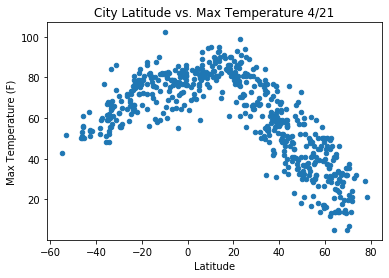

In [7]:
combined_weather["Max Temp"] = (combined_weather["Max Temp"] - 273.15) * 9/5 + 32
combined_weather.plot(kind="scatter",x='Lat',y='Max Temp',legend=False)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature 4/21")
plt.show()

This plot shows that the Max Temperature (F) increases as you approach the equator.

#### Latitude vs. Humidity Plot

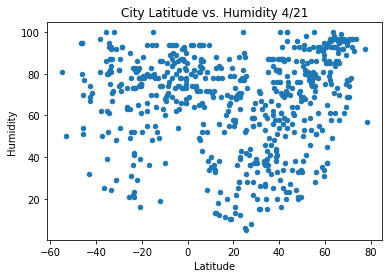

In [8]:
combined_weather.plot(kind="scatter",x='Lat',y='Humidity',legend=False)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity 4/21")
plt.show()

This plot shows that Latitude seemingly has little effect on Humidity.

#### Latitude vs. Cloudiness Plot

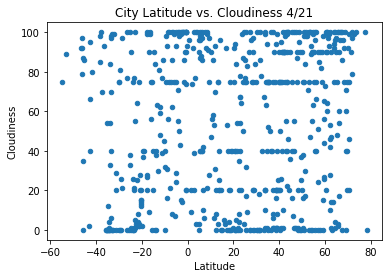

In [9]:
combined_weather.plot(kind="scatter",x='Lat',y='Cloudiness',legend=False)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness 4/21")
plt.show()

This plot shows that Latitude seemingly has little effect on Cloudiness.

#### Latitude vs. Wind Speed Plot

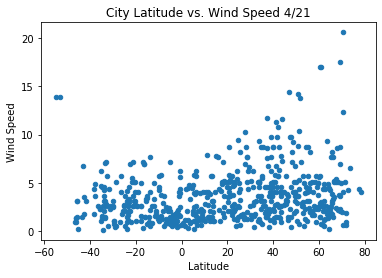

In [10]:
combined_weather.plot(kind="scatter",x='Lat',y='Wind Speed',legend=False)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed 4/21")
plt.show()

Wind speed does not appear to be heavily affected by Latitude, but we do see a slight trend of higher wind speeds above a LAT of 40.

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [152]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = combined_weather[combined_weather["Lat"] > 0].copy()
southern_hem = combined_weather[combined_weather["Lat"] < 0].copy()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

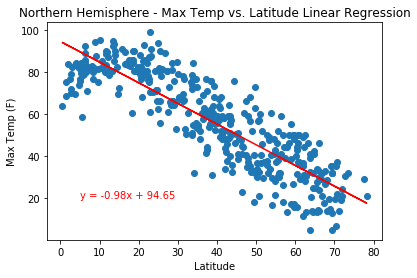

The correlation between both factors is -0.87


In [154]:
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

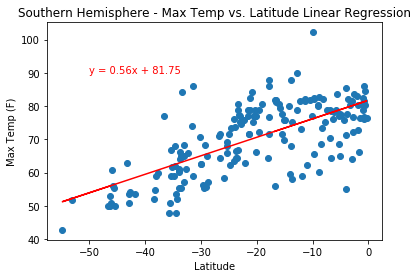

The correlation between both factors is 0.69


In [156]:
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")

Temperature appears to be pretty highly correlated with latitude.  As you approach the equator the temperature will on average rise.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

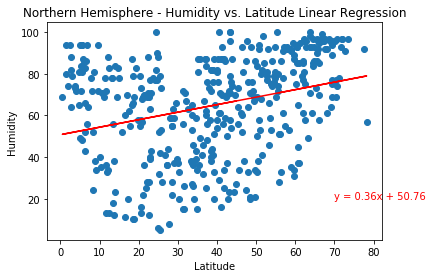

The correlation between both factors is 0.29


In [124]:
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,20),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

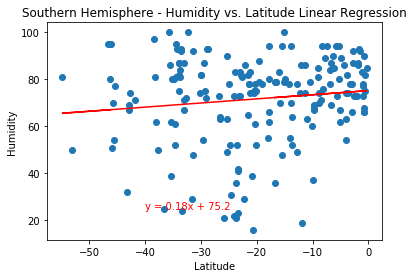

The correlation between both factors is 0.13


In [126]:
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,25),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")

Humidity and Latitude are NOT highly correlated.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

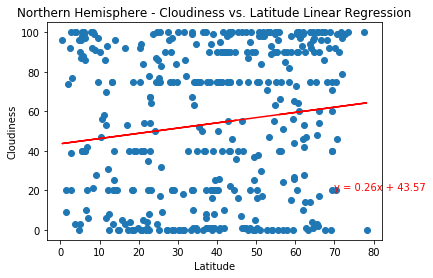

The correlation between both factors is 0.14


In [129]:
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,20),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

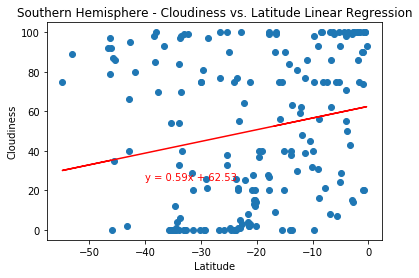

The correlation between both factors is 0.21


In [130]:
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,25),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")

Cloudiness and Latitude are NOT highly correlated.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

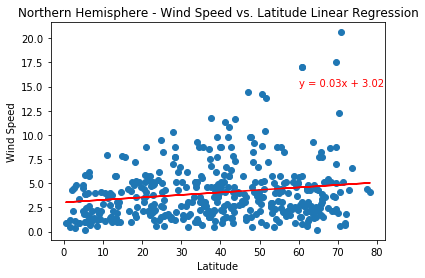

The correlation between both factors is 0.17


In [134]:
x_values = northern_hem['Lat']
y_values = northern_hem['Wind Speed']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,15),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

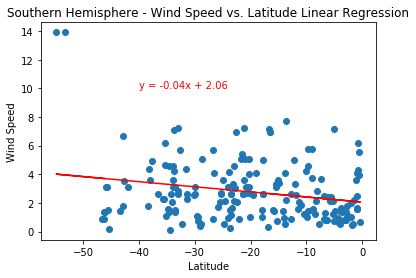

The correlation between both factors is -0.22


In [132]:
x_values = southern_hem['Lat']
y_values = southern_hem['Wind Speed']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")

Wind speed and Latitude are NOT highly correlated.  The linear regressions produced also have very minimal slopes.